# Funciones de distribución de probabilidades 

## Distribución uniforme

Distribución que presenta la misma probabilidad de ocurrir un evento en los intervalos [a,b]

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
a=1   # limite inferior  de la distribución
b=100 # limite superior
n=1000000 # cantidad de numeros
data =  np.random.uniform(a,b,n)  

(array([ 99919.,  99809., 100328., 100315.,  99746., 100037.,  99968.,
         99777., 100324.,  99777.]),
 array([ 1.00008386, 10.90005945, 20.80003505, 30.70001064, 40.59998623,
        50.49996182, 60.39993741, 70.299913  , 80.19988859, 90.09986418,
        99.99983977]),
 <a list of 10 Patch objects>)

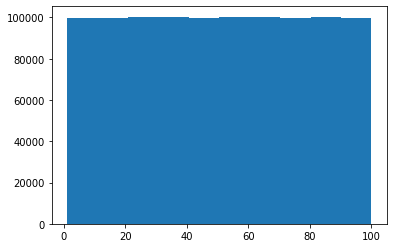

In [13]:
%matplotlib inline
plt.hist(data)

vemos que es casi normal, pero no se aprecia bien ya que el numero de puntos (200) para el rango es muy bajo. Al aumentar los datos a 1000000 tenemos que el histograma muestra que la distribución efectivamente es uniforme

## Distribución normal

Conocida también como campana de Gauss. 
1 sigma ---> 68%

In [18]:
data = np.random.randn(100000)

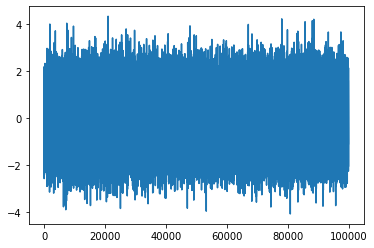

In [27]:
x= range(1,100001)
y= data
plt.plot(x,data)

(array([4.3000e+01, 7.3100e+02, 5.1960e+03, 1.7656e+04, 3.1682e+04,
        2.8499e+04, 1.2739e+04, 3.0770e+03, 3.5000e+02, 2.7000e+01]),
 array([-4.09500925, -3.25030995, -2.40561064, -1.56091134, -0.71621204,
         0.12848726,  0.97318656,  1.81788587,  2.66258517,  3.50728447,
         4.35198377]),
 <a list of 10 Patch objects>)

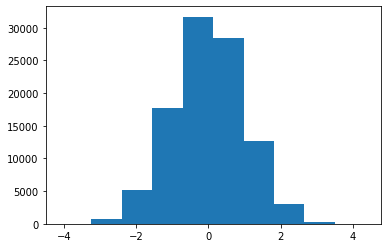

In [28]:
plt.hist(data)

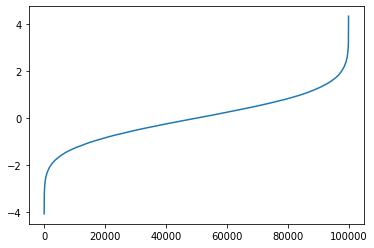

In [29]:
plt.plot(x,sorted(data))

el grafico anterior muestra como se comporta la gaussiana cuando utilizamos un plot sortes, ya que hay muchos valores que se encuentran en el rango entre -2 y 2

(array([  15.,   76.,  477., 1513., 2736., 2746., 1697.,  593.,  133.,
          14.]),
 array([-4.09431679, -2.20780197, -0.32128715,  1.56522767,  3.45174249,
         5.3382573 ,  7.22477212,  9.11128694, 10.99780176, 12.88431657,
        14.77083139]),
 <a list of 10 Patch objects>)

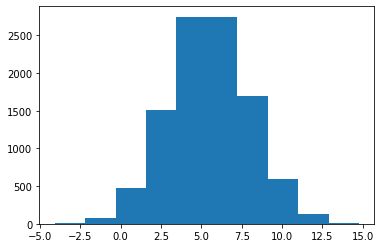

In [30]:
mu = 5.5   #media
sd = 2.5   #desviación estandar
data = mu + sd*np.random.randn(10000) # z= (X- mu)/ sd ---> N(0,1), x= mu +sd*Z
plt.hist(data)

In [36]:
np.random.randn(2,4)   # me ingresa 2 muestras de 4 datos

array([[ 1.81410631, -0.12403362, -1.04465848, -1.53899664],
       [-1.86354519,  0.64701664,  0.04538416,  2.21129857]])

## Simulación de Monte Carlo

### calculando pi
* generamos 2 numeros aleatorios x e y entre 0 y 1, en total N veces.
* calculamos x*x + y*y
        * Si el valor es menor a 1 estamos dentro del circulo
        * si el valor es mayor a 1 estamos fuera del circulo

Calculamos el numero total de veces que estań dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximación de la probabilidad de caer dentro del circulo.
Usamos dicha probabilidad para aproximar el valor de \pi
Repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximaciones de pi.
* calculamos el promedio de los N intentos, para tener una valor final de pi

In [48]:
def pi_montecarlo(n,n_exp):
    pi_avg=0
    n=1000
    pi_value_list=[]
    n_exp=100
    for i in range(n_exp):
        value=0
        x=np.random.uniform(0,1,n).tolist()
        y=np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<=1:
                value += 1
        float_value=float(value)
        pi_value=float_value * 4 /n    # el 4 viene de la teoria de que sabemos que la prob, es pi/4
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi=pi_avg/n_exp
    print(pi)
    fig=plt.plot(pi_value_list)
    return (pi,fig)

3.145519999999999


(3.145519999999999, [<matplotlib.lines.Line2D at 0x7f43b93d3310>])

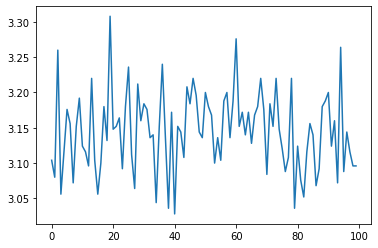

In [49]:
pi_montecarlo(100,1000)

## Dummy datasets

In [57]:
n=10000
data = pd.DataFrame(
    {
        "A" : np.random.randn(n),
        "B" : 1.5+2.5*np.random.randn(n),
        "C" : np.random.uniform(5,32,n)
    }
)

In [58]:
data

,A,B,C
0,0.163628,0.515321,23.481587
1,0.628907,-4.888051,19.907281
2,0.102390,1.977654,6.513723
3,0.847335,4.297864,5.224818
4,1.704438,0.765544,30.260128
...,...,...,...
9995,-0.881876,1.405161,15.110818
9996,0.153774,0.466729,12.096495
9997,-1.393052,1.258006,5.218569
9998,-1.391072,5.008747,27.996008


In [59]:
data.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,0.019739,1.520548,18.455007
std,0.995153,2.483689,7.816556
min,-3.383027,-7.191084,5.001551
25%,-0.661380,-0.147267,11.695052
50%,0.018479,1.532547,18.598247
75%,0.691059,3.183143,25.210467
max,3.703083,11.300632,31.997247


(array([  28.,  206.,  771., 1864., 2675., 2463., 1424.,  452.,  104.,
          13.]),
 array([-3.38302665, -2.67441568, -1.96580472, -1.25719375, -0.54858278,
         0.16002818,  0.86863915,  1.57725012,  2.28586108,  2.99447205,
         3.70308302]),
 <a list of 10 Patch objects>)

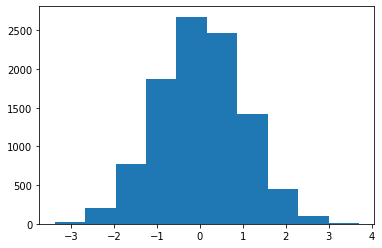

In [60]:
plt.hist(data["A"])

(array([  37.,  189.,  780., 1966., 2867., 2490., 1236.,  367.,   61.,
           7.]),
 array([-7.19108396, -5.34191237, -3.49274079, -1.6435692 ,  0.20560238,
         2.05477397,  3.90394556,  5.75311714,  7.60228873,  9.45146032,
        11.3006319 ]),
 <a list of 10 Patch objects>)

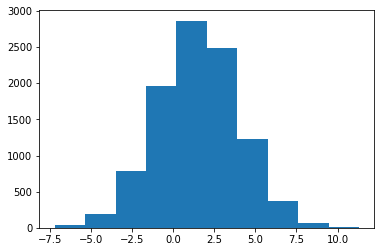

In [61]:
plt.hist(data["B"])

(array([1046., 1007.,  974.,  977.,  951., 1047., 1016., 1000., 1000.,
         982.]),
 array([ 5.00155098,  7.70112063, 10.40069028, 13.10025993, 15.79982958,
        18.49939923, 21.19896888, 23.89853853, 26.59810818, 29.29767783,
        31.99724748]),
 <a list of 10 Patch objects>)

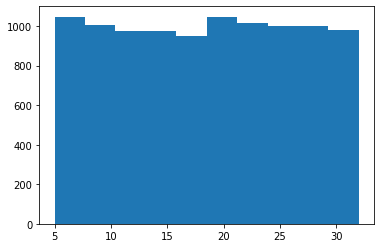

In [62]:
plt.hist(data["C"])

In [63]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [64]:
colum_names= data.columns.values.tolist()

In [66]:
a=len(colum_names)
a

21

In [72]:
new_data =pd.DataFrame(
{
    "Colum Name": colum_names,
    "a": np.random.randn(a),
    "b": np.random.uniform(0,1,a)
}, index= range(42,42+a)   # esto te asigna para concatenar archivos, ya no empiezan desde 0
)

In [75]:
new_data["Colum Name"][42]  # si pongo posicion 0 no sirve.


'State'